## Abril de 2021
## IB0017 Tarea 3 
## Estudiante: Mateo Cerdas Barboza

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Modelos matemáticos a utilizar
#### Maxwell
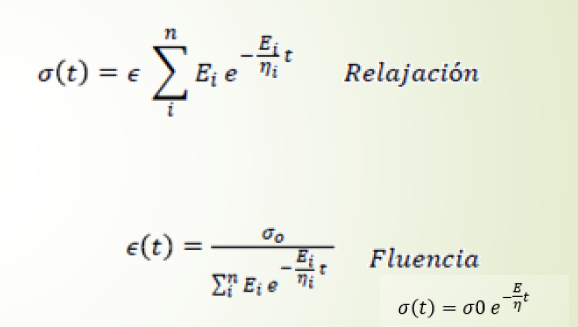

#### Kelvin
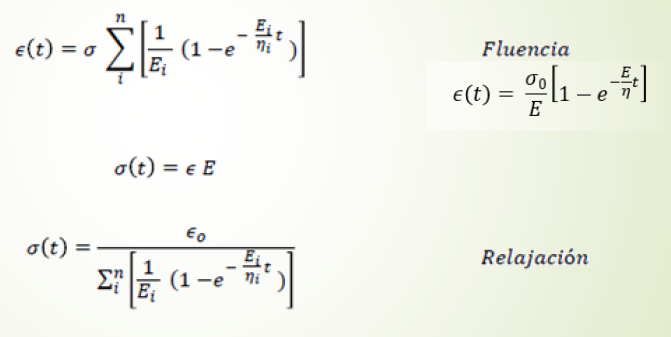

#### Burger
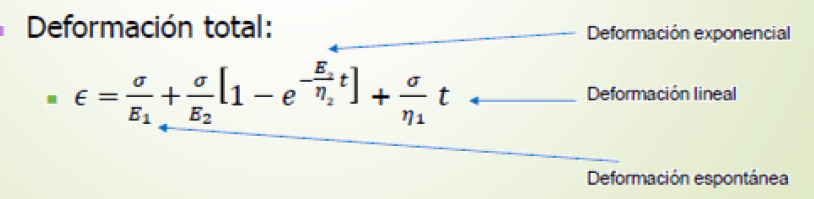

#### Definir función que devuelve  el vector de las sumas  del modelo de maxwell

In [2]:
def maxwell_sum_t(E_series, Tau_series, time):
    zi=zip(E_series, Tau_series)
    result=sum([E*np.exp(-(1/Tau)*time) for E,Tau in zi])
    return result

#### Definir función que devuelve  el vector de las sumas  del modelo de Kelvin

In [3]:
def kelvin_sum_t(E_series, Tau_series, time):
    zi=zip(E_series, Tau_series)
    result=sum([(1/E)*(1-np.exp(-(1/Tau)*time)) for E,Tau in zi])
    return result

### Problemas al final de la presentación 

In [4]:
# Insertando valores dados
# E(GN/m²)
E_series=np.array([3,2.5,2,1.5,1.20,1.1,1])*10**9
#Tau(s)
Tau_series=np.array([10**n for n in range(0,7)])
# σ(N/m2)
sigma_series=np.array([0.5,0.75,1,1.25,1.5])
 #ϵ(%)
epsilon_series=[0.1,0.2,0.3,0.4,0.5]

In [5]:
# Generar el vector de sumas del modelo de Maxwell
time_series=np.array(range(0,600))
sum_series=maxwell_sum_t(E_series, Tau_series,time_series)

#### Modelo de maxwell en Fluencia

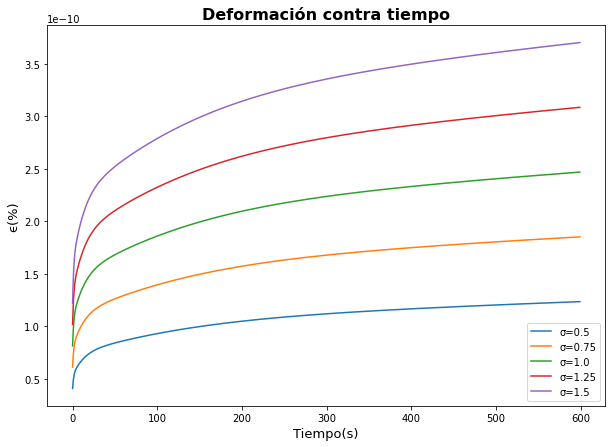

In [6]:
plt.figure(figsize=(10,7))
for sigma in sigma_series:
    y=sigma/sum_series
    label=f"σ={sigma}"
    plt.plot(time_series,y,label=label)
plt.legend(loc='lower right')
plt.title("Deformación contra tiempo", fontsize=16, fontweight='bold')
plt.xlabel("Tiempo(s)",fontsize=13)
plt.ylabel("ϵ(%)",fontsize=13)
plt.show()

#### Modelo de maxwell en Relajación

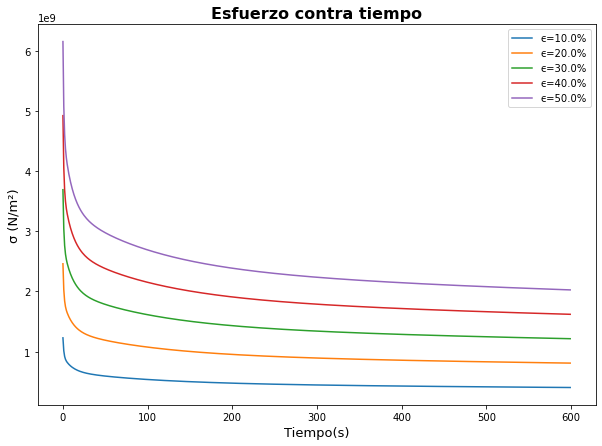

In [7]:
plt.figure(figsize=(10,7))
for epsilon in epsilon_series:
    y=epsilon*sum_series
    label=f"ϵ={epsilon*100}%"
    plt.plot(time_series,y,label=label)
plt.legend(loc='upper right')
plt.title("Esfuerzo contra tiempo", fontsize=16, fontweight='bold')
plt.xlabel("Tiempo(s)",fontsize=13)
plt.ylabel("σ (N/m²)",fontsize=13)
plt.show() 

### Problemas extra de materiales viscoelásticos.
### 1)
###  Se tienen tres elementos de Kelvin-Voight en serie
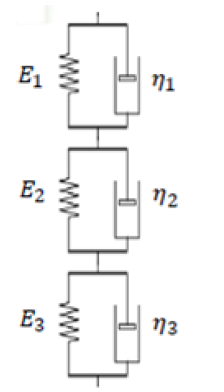

In [8]:
# Definir datos dados
#carga(Pa)
sigma_series=np.array([0.5,0.75,1,1.25,1.5])
#deformación cte(%)
epsilon_series=np.array([0.1,0.3,0.5,0.7,0.9])
#módulo de elasticidad(Pa)
E_series=np.array([6,3,1])*10**9
#n/E= Tau(s)
tau_series=np.array([10**2,10**4,10**6])#hay un valor sobrante

#### Definir función que devuelve el vector de las sumas del modelo de Kelvin-Voight

In [9]:
def kelvin_sum_t(E_series, Tau_series, time):
    zi=zip(E_series, Tau_series)
    result=sum([(1/E)*(1-np.exp(-(1/Tau)*time)) for E,Tau in zi])
    return result

In [10]:
#generar serie de tiempo(s)
time_series=np.array(range(1,60*3))
#obtener vector de sumas del modelo de kelvin con la función generada antes
sum_series=kelvin_sum_t(E_series,tau_series,time_series)

#### Modelo de Kelvin en Fluencia

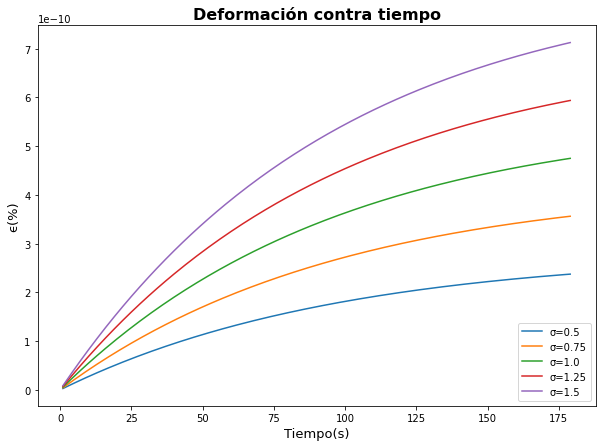

In [11]:
#graficar de fluencia
#definir función que grafica fluencia dada la serie de sumas del modelo y esfuerzos a probar
plt.figure(figsize=(10,7))
for sigma in sigma_series:
    y=sigma*sum_series
    label=f"σ={sigma}"
    plt.plot(time_series,y,label=label)
plt.legend(loc='lower right')
plt.title("Deformación contra tiempo", fontsize=16, fontweight='bold')
plt.xlabel("Tiempo(s)",fontsize=13)
plt.ylabel("ϵ(%)",fontsize=13)
plt.show()

#### Discusión: Se observa que a mayor σ, mayor creciemetno exponencial en  la curva de deformación vs t

#### Modelo de Kelvin en Relajación

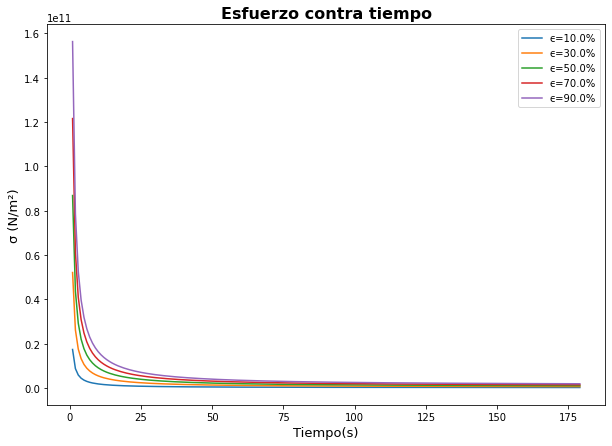

In [12]:
plt.figure(figsize=(10,7))
for epsilon in epsilon_series:
    y=epsilon/sum_series
    label=f"ϵ={epsilon*100}%"
    plt.plot(time_series,y,label=label)
plt.legend(loc='upper right')
plt.title("Esfuerzo contra tiempo", fontsize=16, fontweight='bold')
plt.xlabel("Tiempo(s)",fontsize=13)
plt.ylabel("σ (N/m²)",fontsize=13)
plt.show() 

#### Discusión: Se observa que el esfuerzo disminuye mas bruscamente para la menor deformación constante